HR Analytics Dataset This dataset was created to explore the diverse factors impacting employee performance and satisfaction in a typical organization. It spans a variety of fields from personal demographics to performance metrics and job details, offering a comprehensive view into the dynamics of the workplace.The inspiration behind the creation of this dataset is to provide an accessible resource for those interested in the field of HR analytics. It can be used to derive insights into employee performance, satisfaction, and overall engagement at work. The aim is to find Attrition of employees



In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
data=pd.read_csv(r"C:\Users\Saloni\Documents\Project Dataset.csv")
data

,Age,DailyRate,Department,EducationField,Gender,JobRole,MonthlyIncome,MonthlyRate,Attrition
0,24,1084,Support,Medical,Male,Developer,48603,583236,No
1,22,537,Sales,Life Sciences,Female,Sales Representative,19157,249041,No
2,33,418,Human Resources,Other,Male,Human Resources,42054,1261620,Yes
3,20,516,Human Resources,Human Resources,Female,Sales Executive,28613,114452,No
4,48,497,Human Resources,Human Resources,Male,Healthcare Representative,11207,212933,No
...,...,...,...,...,...,...,...,...,...
9995,24,1456,Research & Development,Technical Degree,Male,Research Scientist,40788,1182852,No
9996,46,1370,Human Resources,Human Resources,Female,Manufacturing Director,2792,61424,No
9997,46,259,Sales,Medical,Female,Manager,45603,1368090,Yes
9998,32,935,Sales,Marketing,Female,Manufacturing Director,1411,29631,Yes


In [4]:
# checking null values
data.isna().sum()

Age               0
DailyRate         0
Department        0
EducationField    0
Gender            0
JobRole           0
MonthlyIncome     0
MonthlyRate       0
Attrition         0
dtype: int64

There are no null values in data

In [5]:
data.duplicated().sum()

0

There are no duplicate values in data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             10000 non-null  int64 
 1   DailyRate       10000 non-null  int64 
 2   Department      10000 non-null  object
 3   EducationField  10000 non-null  object
 4   Gender          10000 non-null  object
 5   JobRole         10000 non-null  object
 6   MonthlyIncome   10000 non-null  int64 
 7   MonthlyRate     10000 non-null  int64 
 8   Attrition       10000 non-null  object
dtypes: int64(4), object(5)
memory usage: 703.3+ KB


In [7]:
data.describe()

,Age,DailyRate,MonthlyIncome,MonthlyRate
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,39.036400,806.545600,25806.677300,4.003443e+05
std,12.489318,405.132923,14424.452197,3.390766e+05
min,18.000000,100.000000,1001.000000,1.270000e+03
25%,28.000000,455.000000,13366.250000,1.216832e+05
50%,39.000000,807.500000,25438.500000,3.072980e+05
75%,50.000000,1160.000000,38385.000000,5.984052e+05
max,60.000000,1500.000000,50996.000000,1.523280e+06


Checking values for few object type columns

In [8]:
data.Gender.value_counts()

Gender
Male      5019
Female    4981
Name: count, dtype: int64

In [9]:
data.Age.value_counts()

Age
48    260
21    259
57    255
28    254
60    254
41    252
33    249
56    248
26    248
39    246
31    246
55    243
46    242
50    242
24    240
49    239
18    238
23    238
34    237
29    235
58    235
22    234
54    234
51    234
27    232
43    231
45    225
19    225
25    225
42    222
30    221
36    220
53    219
38    219
35    218
37    218
47    218
40    217
52    217
59    213
20    209
32    199
44    190
Name: count, dtype: int64

In [10]:
data.Department.value_counts()

Department
Support                   1721
Hardware                  1692
Research & Development    1681
Software                  1665
Human Resources           1621
Sales                     1620
Name: count, dtype: int64

In [11]:
data.EducationField.value_counts()

EducationField
Marketing           1717
Medical             1703
Life Sciences       1671
Other               1669
Human Resources     1640
Technical Degree    1600
Name: count, dtype: int64

In [12]:
data.JobRole.value_counts()

JobRole
Manager                      1083
Research Director            1018
Manufacturing Director       1018
Healthcare Representative    1004
Laboratory Technician         997
Human Resources               990
Sales Executive               989
Developer                     980
Sales Representative          973
Research Scientist            948
Name: count, dtype: int64

Exploratory Data Analysis

Univariate Analysis
Univariate analysis is used to analyze the data of single variable.

C:\Users\Saloni\Documents\New folder\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


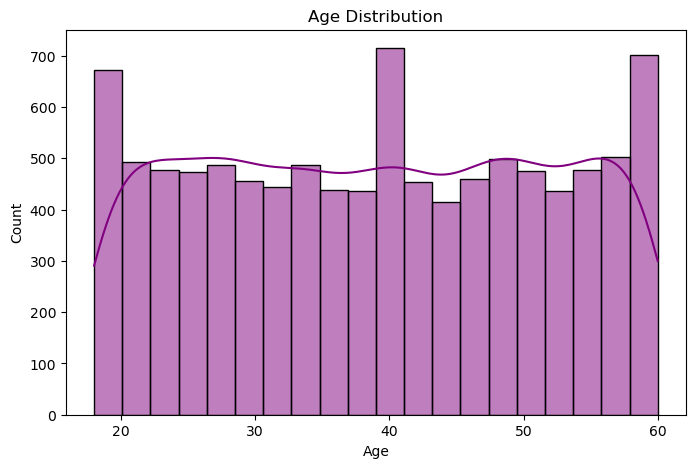

In [14]:
# Distribution of Age
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=20, kde=True, color='purple')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The age distribution histogram indicates the frequency of employees in different age groups.he histogram shows peaks around the early 20s and late 50s, suggesting that there are two prominent groups of employees – younger employees and those close to retirement.The age distribution appears fairly uniform between ages 25 to 55, with slight fluctuations. However, extreme age groups (youngest and oldest) show a slight increase.The presence of more employees in the youngest and oldest age groups suggests hiring trends that either focus on entry-level recruitment or retention of experienced professionals.The Kernel Density Estimation (KDE) line provides a smoothed curve representing age distribution. It aligns with the histogram's peaks and dips, reinforcing the bimodal nature.The organization seems to have a mix of young and experienced employees.The hiring and retention policies might be favoring fresh graduates and senior professionals.Future workforce planning should consider strategies to maintain a balanced age distribution.

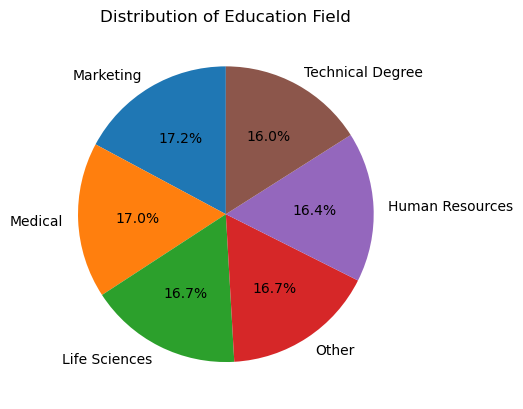

In [16]:
#  Pie Chart for Education Field Distribution
EducationField_count=data["EducationField"].value_counts()
plt.pie(EducationField_count,labels=EducationField_count.index,autopct="%1.1f%%",startangle=90)
plt.title("Distribution of Education Field")
plt.show()

InterpretationThe pie chart above represents the distribution of employees across different education fields in the dataset.he proportions of employees in each education field are quite similar, ranging from 16% to 17.2%, indicating that the company hires individuals from a variety of educational backgrounds.he Marketing and Medical fields have slightly higher representation, around 17.2% and 17.0%, suggesting they are more common among employees.ince no single education field dominates, it indicates that the company does not prioritize a specific educational background but hires across diverse disciplines.The company maintains a well-balanced hiring approach across multiple educational fields. If there is a particular business need, further analysis can be conducted to see if certain fields correlate with higher performance, retention, or attrition rates.

Multivariate Anaylsis

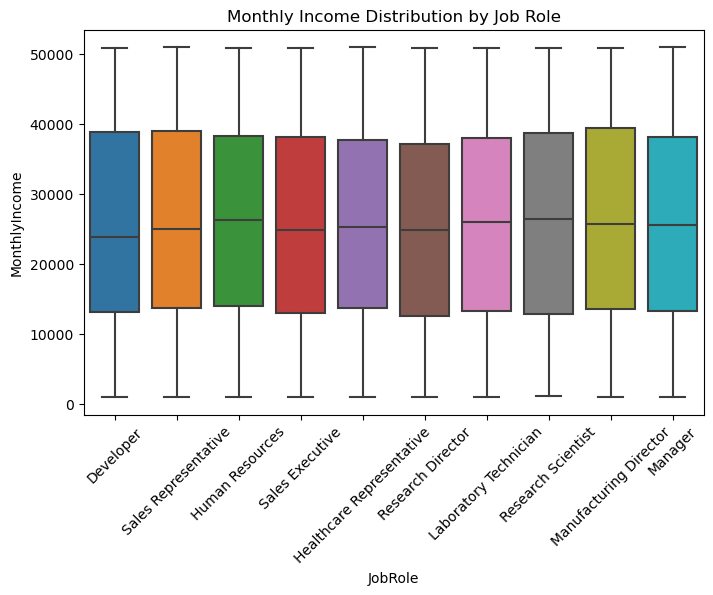

In [20]:
#Boxplot of Monthly Income by Job Role
plt.figure(figsize=(8,5))
sns.boxplot(x=data["JobRole"], y=data["MonthlyIncome"])
plt.xticks(rotation=45)
plt.title("Monthly Income Distribution by Job Role")
plt.xlabel("JobRole")
plt.ylabel("MonthlyIncome")
plt.show()

Interpretation of the Boxplot for Monthly Income Across Job Roles:The boxplots for all job roles have a similar spread, indicating that the income distribution is fairly consistent across different roles.The median monthly income for all roles is almost at the same level, suggesting that salaries do not vary significantly based on job role.The whiskers extend to a wide range, and there may be some extreme values (potential outliers), indicating that some employees in each role earn significantly higher or lower salaries than the rest.The interquartile range (IQR) for each job role is quite broad, meaning there is variation in salaries within the same role.There isn’t a strong distinction in pay based on job titles, which could indicate that salary is influenced more by experience, performance, or other factors rather than just job designation.

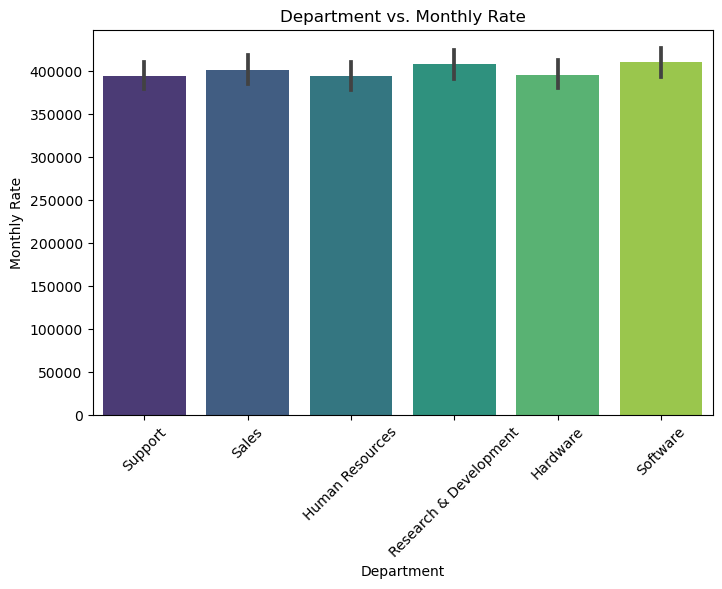

In [24]:
# Bar Plot for Department vs. Monthly Rate
plt.figure(figsize=(8,5))
sns.barplot(x=data["Department"], y=data["MonthlyRate"], palette="viridis")

plt.title("Department vs. Monthly Rate")
plt.xlabel("Department")
plt.ylabel("Monthly Rate")
plt.xticks(rotation=45)
plt.show()

Interpretation/Conclusion of the "Department vs. Monthly Rate" Graph:The graph shows that the average monthly rate is fairly consistent across all departments, with minor variations. This suggests that employees in different departments receive comparable compensation in terms of their monthly rate.
The small error bars indicate low variance in monthly rate within departments, reinforcing the idea that there isn't much fluctuation in pay between employees within the same department.Since the bars are closely aligned, this suggests that no single department has a significantly higher or lower monthly rate compared to others.This visualization might indicate that the company follows a structured pay scale across departments, preventing extreme differences in monthly rates.

In [25]:
# Identify categorical columns and encode them
label_encoders = {}
for col in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [26]:
# Split features and target variable (assuming 'Attrition' is the target column)
X = data.drop(columns=["Attrition"], errors='ignore')
y = data["Attrition"]


In [27]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [29]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [30]:
# Train and evaluate models
results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

C:\Users\Saloni\Documents\New folder\New folder\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:46:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [32]:
# Display results
for model, metrics in results.items():
    print(f"{model}: {metrics}")



Logistic Regression: {'Accuracy': 0.5185, 'Precision': 0.5141509433962265, 'Recall': 0.2235897435897436, 'F1-score': 0.31165117941386705}
Random Forest: {'Accuracy': 0.498, 'Precision': 0.48379888268156424, 'Recall': 0.4441025641025641, 'F1-score': 0.4631016042780749}
SVM: {'Accuracy': 0.4925, 'Precision': 0.4697885196374622, 'Recall': 0.318974358974359, 'F1-score': 0.37996334758704947}
XGBoost: {'Accuracy': 0.5055, 'Precision': 0.4926315789473684, 'Recall': 0.48, 'F1-score': 0.4862337662337662}


In [33]:
# Display predictions
for model, preds in predictions.items():
    print(f"Predictions from {model}: {preds[:10]}")  # Display first 10 predictions


Predictions from Logistic Regression: [0 0 0 1 0 1 0 0 0 0]
Predictions from Random Forest: [0 0 0 1 1 1 0 0 1 0]
Predictions from SVM: [0 0 0 0 1 1 0 0 1 0]
Predictions from XGBoost: [1 0 1 0 1 1 0 0 1 1]
